Import libraries

In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import functions as ff

Scaling using Standard Scaler

All variables were standardized to z-scores, with a mean = 0 and standard deviation = 1.

In [126]:
df= pd.read_excel('../df_SPY_VBMFX_Macro_Signals.xlsx',index_col=0,sheet_name='Sheet1')
scaler = StandardScaler() # initialize 
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)

Use PCA to reduce redundancy.

In [127]:
pca = PCA(n_components=0.95, random_state=42) # initialize pca object, 42 seed data
X_pca = pca.fit_transform(df_scaled) # making sure to use the scaled data set
# result of pca is a matrix and need to convert to a df
df_pca = pd.DataFrame(
    X_pca,
    index=df_scaled.index,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

In [128]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1993-04-30 to 2025-09-30
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     390 non-null    float64
 1   PC2     390 non-null    float64
 2   PC3     390 non-null    float64
 3   PC4     390 non-null    float64
 4   PC5     390 non-null    float64
 5   PC6     390 non-null    float64
 6   PC7     390 non-null    float64
 7   PC8     390 non-null    float64
 8   PC9     390 non-null    float64
 9   PC10    390 non-null    float64
 10  PC11    390 non-null    float64
 11  PC12    390 non-null    float64
 12  PC13    390 non-null    float64
 13  PC14    390 non-null    float64
 14  PC15    390 non-null    float64
 15  PC16    390 non-null    float64
 16  PC17    390 non-null    float64
 17  PC18    390 non-null    float64
 18  PC19    390 non-null    float64
 19  PC20    390 non-null    float64
 20  PC21    390 non-null    float64
 21  PC22    390 non-null

In [129]:
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
1993-04-30,2.834977,-5.039700,-1.219851,1.499993,-0.885268,-0.717552,-0.492937,3.037461,-2.573233,-0.535718,...,-0.164548,-0.672810,1.271284,-0.264927,-0.042847,-0.235843,2.294925,0.874933,0.108751,-0.532134
1993-05-31,0.072084,-4.776976,-3.246425,1.338798,-0.445240,-2.341074,0.224007,1.759112,-2.402277,-0.339296,...,-0.616069,1.313068,1.138813,-0.586427,-0.909656,0.654845,-0.688057,0.252171,1.039216,-0.511470
1993-06-30,2.433469,-5.623942,-0.246899,-1.309423,-1.711940,-2.981699,2.064498,0.424718,-0.476116,-1.579785,...,1.377787,1.809618,0.742524,-0.590238,-1.043465,1.040109,-0.434216,0.271846,0.703035,0.055426
1993-07-31,0.870174,-4.916832,-2.702818,-0.515409,-1.231429,-0.705571,0.288317,2.726298,-1.697834,0.838593,...,-0.936013,-0.192222,0.692186,0.242177,-1.043458,-0.024286,1.512879,0.317343,1.287949,0.801513
1993-08-31,4.093231,-5.658279,-0.590671,-4.094341,-0.511332,-1.699335,1.007804,1.442087,-0.898796,-0.094163,...,0.802587,0.606505,0.604402,0.389869,-1.219660,0.194227,0.783853,0.501064,0.818518,0.106738


PCA reduced the 90 original features to 24 principal components. These 24 components 95% percent of the variance. 

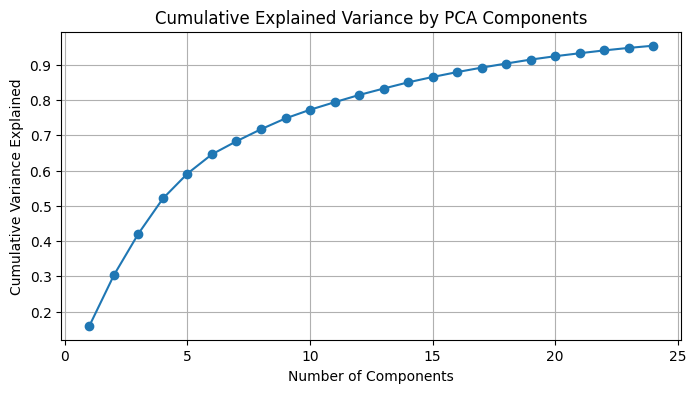

Number of components selected: 24


In [130]:
explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()
print(f"Number of components selected: {pca.n_components_}")

In [131]:
# get original feature names
feature_names = df_scaled.columns
# get the component matrix
loadings_matrix = pca.components_
n_pcs = pca.n_components_ # get number of components, should be 24
# create dataframes
df_loadings = pd.DataFrame(
    loadings_matrix.T, # transpose to have Features as rows and PCs as columns
    columns=[f'PC{i+1}' for i in range(n_pcs)],
    index=feature_names
)

In [137]:
df.columns

Index(['SPY', 'SPY_mom', 'SPY_3m', 'SPY_3m_ann', 'SPY_3m_sd', 'SPY_3m_ann_sd',
       'SPY_ln_3m', 'SPY_ann_ln_3m', 'VBMFX', 'VBMFX_mom', 'VBMFX_3m',
       'VBMFX_3m_ann', 'VBMFX_3m_sd', 'VBMFX_3m_ann_sd', 'VBMFX_ln_3m',
       'VBMFX_ann_ln_3m', 'RealGDP', 'RealGDP_lag', 'RealGDP_mom',
       'RealGDP_yoy', 'UnemploymentRate', 'UnRate_mom', 'UnRate_3m',
       'UnRate_yoy', 'Permits', 'Permits_Lag_r3m', 'Permits_Lag_ann_r3m',
       'PermitsLag_yoy', 'CPI', 'CPI_Lag_r3m', 'CPI_Lag_ann_r3m', 'CPILag_yoy',
       'CoreCPI', 'CoreCPI_Lag_r3m', 'CoreCPI_Lag_ann_r3m', 'CoreCPILag_yoy',
       'IndustrialProd', 'IndustrialProd_Lag_r3m',
       'IndustrialProd_Lag_ann_r3m', 'IndustrialProdLag_yoy', 'RetailTrade',
       'RetailTrade_Lag_r3m', 'RetailTrade_Lag_ann_r3m', 'RetailTrade_Lag_yoy',
       'RealGDP_lag.1', 'UnRate_3m.1', 'Permits_Lag_r3m.1',
       'IndustrialProd_Lag_r3m.1', 'CPI_Lag_r3m.1', 'CoreCPI_Lag_r3m.1',
       'RetailTrade_Lag_r3m.1', 'Mort30Y', 'UST10Y', 'UST2Y', 'UST3M'

In [132]:
# select a component
pc1_loadings = df_loadings['PC1']
top_pc1_loadings = pc1_loadings.abs().sort_values(ascending=False).head(5) # get the absolute val, sort
top_features_pc1 = df_loadings.loc[top_pc1_loadings.index, 'PC1'] # get the features
print("Top 5 Feature Loadings for PC1:")
print(top_features_pc1)

Top 5 Feature Loadings for PC1:
Mort30Y_Delta3m   -0.179982
UST2Y_Delta3m     -0.179024
VBMFX_ann_ln_3m    0.178122
VBMFX_3m           0.177560
VBMFX_3m_ann       0.175458
Name: PC1, dtype: float64


In [133]:
# select a component
pc2_loadings = df_loadings['PC2']
top_pc2_loadings = pc2_loadings.abs().sort_values(ascending=False).head(5) # get the absolute val, sort
top_features_pc2 = df_loadings.loc[top_pc2_loadings.index, 'PC2'] # get the features
print("Top 5 Feature Loadings for PC2:")
print(top_features_pc2)

Top 5 Feature Loadings for PC2:
VBMFX            0.251899
UST10Y          -0.248603
CorpAAA         -0.242916
RealGDP_lag      0.230665
RealGDP_lag.1    0.230665
Name: PC2, dtype: float64


In [136]:
# select a component
pc3_loadings = df_loadings['PC3']
top_pc3_loadings = pc3_loadings.abs().sort_values(ascending=False).head(5) # get the absolute val, sort
top_features_pc3 = df_loadings.loc[top_pc3_loadings.index, 'PC3'] # get the features
print("Top 5 Feature Loadings for pc3:")
print(top_features_pc3)

Top 5 Feature Loadings for pc3:
Slope_10Y_3M   -0.209543
Slope_10Y_FF   -0.204527
UnRate_3m      -0.189968
UnRate_3m.1    -0.189968
Slope_10Y_2Y   -0.182923
Name: PC3, dtype: float64


Clustering

We used the PCA-transformed features as inputs for the kMeans clustering analysis. 

In [ ]:
best_k = 7 # set to 5 clusters
kmeans = KMeans(n_clusters=best_k, random_state=42,n_init=10) #n_init=10 is 'auto'
df_clusters = df_pca.copy()
df_clusters['Regime'] = kmeans.fit_predict(df_pca) # making sure to use the df_pca

Graph below shows the regime clusters over time, highlighting regime transitions. These regime-clusters will be used to label each observation(row) in our dataset.

We originally set the clusters to 4 but the 4 clusters showed limited differentiation when comparing their average sharpe-ratio. 

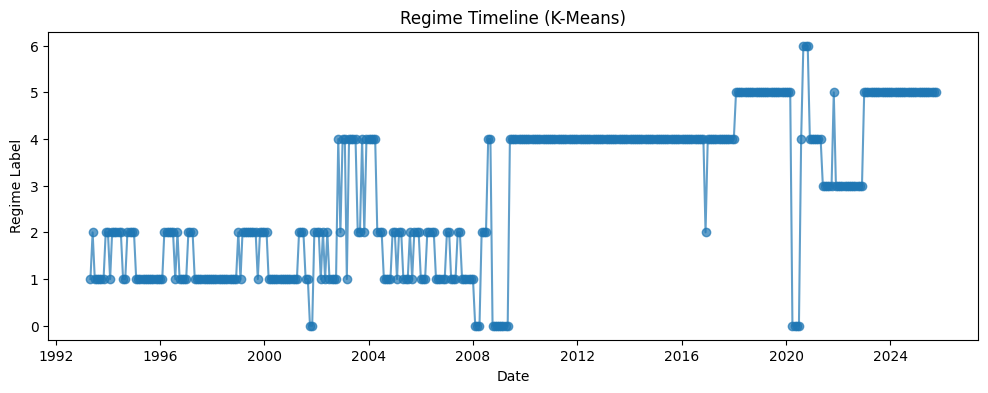

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_clusters.index, df_clusters['Regime'], marker='o', linestyle='-', alpha=0.7)
plt.title("Regime Timeline (K-Means)")
plt.xlabel("Date")
plt.ylabel("Regime Label")
plt.yticks(np.arange(df_clusters['Regime'].min(), df_clusters['Regime'].max() + 1, 1))
plt.show()

In [ ]:
df_clusters.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,Regime
1993-04-30,2.834977,-5.039700,-1.219851,1.499993,-0.885268,-0.717552,-0.492937,3.037461,-2.573233,-0.535718,...,-0.672810,1.271284,-0.264927,-0.042847,-0.235843,2.294925,0.874933,0.108751,-0.532134,1
1993-05-31,0.072084,-4.776976,-3.246425,1.338798,-0.445240,-2.341074,0.224007,1.759112,-2.402277,-0.339296,...,1.313068,1.138813,-0.586427,-0.909656,0.654845,-0.688057,0.252171,1.039216,-0.511470,2
1993-06-30,2.433469,-5.623942,-0.246899,-1.309423,-1.711940,-2.981699,2.064498,0.424718,-0.476116,-1.579785,...,1.809618,0.742524,-0.590238,-1.043465,1.040109,-0.434216,0.271846,0.703035,0.055426,1
1993-07-31,0.870174,-4.916832,-2.702818,-0.515409,-1.231429,-0.705571,0.288317,2.726298,-1.697834,0.838593,...,-0.192222,0.692186,0.242177,-1.043458,-0.024286,1.512879,0.317343,1.287949,0.801513,1
1993-08-31,4.093231,-5.658279,-0.590671,-4.094341,-0.511332,-1.699335,1.007804,1.442087,-0.898796,-0.094163,...,0.606505,0.604402,0.389869,-1.219660,0.194227,0.783853,0.501064,0.818518,0.106738,1


We will use the cluster labels to add the regimes to our original data set.

In [ ]:
df = df.join(df_clusters['Regime'], how='inner')

In [ ]:
df_summary = df.groupby('Regime')[["SPY_3m","VBMFX_3m"]].agg(['mean','std']) # groupby using the regime, and then find teh mean and std
df_summary.columns = ['SPY_mean','SPY_std','VBMFX_mean','VBMFX_std'] # make single column

# Sharpe ratios ( excluding risk free rate) - using this as an estimate
df_summary['SPY_Sharpe'] = df_summary['SPY_mean'] / df_summary['SPY_std']
df_summary['VBMFX_Sharpe'] = df_summary['VBMFX_mean'] / df_summary['VBMFX_std']
df_summary = df_summary[['SPY_mean', 'SPY_std', 'SPY_Sharpe','VBMFX_mean','VBMFX_std','VBMFX_Sharpe']] # re-order columns

We are using a modified version of the sharpe ratio ( expected returns minus the risk-free rate divided by the standard deviation). We will exclude the risk-free return. This measure is a no risk adjusted ratio.

In [ ]:
df_summary['Indicator'] = df_summary.apply(ff.bucket_indicator, axis=1)

In [ ]:
df_summary

,SPY_mean,SPY_std,SPY_Sharpe,VBMFX_mean,VBMFX_std,VBMFX_Sharpe,Indicator
Regime,,,,,,,
0,-0.106399,0.117995,-0.901726,0.022653,0.021989,1.030169,-1.931895
1,0.022658,0.074703,0.303304,0.026860,0.013268,2.024323,-1.721019
2,0.032414,0.046713,0.693892,-0.003848,0.013922,-0.276390,0.970283
3,-0.002721,0.071879,-0.037849,-0.022120,0.033306,-0.664143,0.626294
4,0.044982,0.061732,0.728671,0.010484,0.015209,0.689286,0.039384
5,0.041657,0.059807,0.696518,0.011448,0.024730,0.462922,0.233596
6,0.082446,0.074729,1.103260,0.000891,0.014519,0.061386,1.041875


In [ ]:
df_summary['Bucket'] = df_summary.apply(ff.assign_bucket, axis=1)

In [ ]:
df_summary

,SPY_mean,SPY_std,SPY_Sharpe,VBMFX_mean,VBMFX_std,VBMFX_Sharpe,Indicator,Bucket
Regime,,,,,,,,
0,-0.106399,0.117995,-0.901726,0.022653,0.021989,1.030169,-1.931895,50/50
1,0.022658,0.074703,0.303304,0.026860,0.013268,2.024323,-1.721019,50/50
2,0.032414,0.046713,0.693892,-0.003848,0.013922,-0.276390,0.970283,80/20
3,-0.002721,0.071879,-0.037849,-0.022120,0.033306,-0.664143,0.626294,70/30
4,0.044982,0.061732,0.728671,0.010484,0.015209,0.689286,0.039384,60/40
5,0.041657,0.059807,0.696518,0.011448,0.024730,0.462922,0.233596,60/40
6,0.082446,0.074729,1.103260,0.000891,0.014519,0.061386,1.041875,80/20


In [ ]:
bucket_map = df_summary['Bucket'].to_dict()
df['Bucket'] = df['Regime'].map(bucket_map)

In [ ]:
df

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m,Regime,Bucket
1993-04-30,24.480000,-0.025587,0.006867,0.027754,0.025016,0.050031,-0.025920,0.027376,2.382549,0.007438,...,-0.24,-0.05,2.12,-0.06,0.01,0.76,0.18,0.06,1,50/50
1993-05-31,25.140213,0.026970,0.023107,0.095680,0.029114,0.058228,0.026612,0.091375,2.385895,0.001405,...,-0.06,-0.28,2.10,-0.02,-0.10,0.80,0.04,0.18,2,80/20
1993-06-30,25.230892,0.003607,0.004302,0.017319,0.026332,0.052664,0.003600,0.017170,2.428994,0.018064,...,0.14,-0.16,2.16,0.06,-0.02,0.72,-0.08,0.14,1,50/50
1993-07-31,25.108412,-0.004854,0.025670,0.106704,0.016483,0.032966,-0.004866,0.101386,2.443795,0.006094,...,-0.19,-0.11,2.05,-0.11,-0.07,0.80,0.08,0.04,1,50/50
1993-08-31,26.070768,0.038328,0.037015,0.156484,0.022883,0.045767,0.037612,0.145384,2.485172,0.016931,...,-0.05,-0.10,1.91,-0.14,-0.19,0.71,-0.09,-0.09,1,50/50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,586.028015,0.062845,-0.005078,-0.020156,0.059701,0.119402,0.060949,-0.020362,9.469428,-0.007126,...,-0.11,0.13,1.84,-0.12,0.27,0.74,-0.01,0.14,5,60/40
2025-06-30,616.141785,0.051386,0.107772,0.505918,0.038411,0.076822,0.050110,0.409403,9.618223,0.015713,...,0.00,0.02,1.75,-0.09,-0.01,0.65,-0.09,-0.03,5,60/40
2025-07-31,630.332458,0.023032,0.143197,0.707987,0.020495,0.040991,0.022770,0.535316,9.589507,-0.002986,...,-0.06,-0.17,1.67,-0.08,-0.29,0.63,-0.02,-0.12,5,60/40
2025-08-31,643.266602,0.020520,0.097672,0.451746,0.017142,0.034284,0.020312,0.372767,9.669253,0.008316,...,0.15,0.09,1.80,0.13,-0.04,0.61,-0.02,-0.13,5,60/40
